Завдання на виробничу практику

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed

In [ ]:
Посилання на GitHub

1.Побудувати функцiю для обчислення значення функцiї Лаґерра за формулою (1.2) для довiльних t i n, а параметри задавати за замовчуванням β = 2, σ = 4.

In [2]:
def lagger(t, n, b=0, o=1):
    if b < 0 or b > o:
        raise ValueError("Wrong parameters")

    lpp = np.sqrt(o)*np.exp(-b*t/2)
    lp = np.sqrt(o)*(1 - o*t)*np.exp(-b*t/2)

    if n == 0:
        return lpp
    if n == 1:
        return lp

    for i in range(2, n+1):
        temp = lp
        lp = (2*i - 1 - o*t)*lp/i - (i-1)*lpp / i
        lpp = temp

    return lp

2. Побудувати функцiю для табулювання при заданих n, β, σ функцiї Лаґерра на вiдрiзку [0, T] iз заданим T ∈ R+

In [3]:
def tabulate_lagger(T, n, b, sigma):
    t = np.linspace(1, T, T)
    results = lagger(t, n, b, sigma)
    df = pd.DataFrame({'t': t, 'l': results})
    return df.round(4)

In [4]:
print("T=5, n=3, beta=2, sigma=4")
tabulate_lagger(5, 3, 2, 4)

T=5, n=3, beta=2, sigma=4


,t,l
0,1.0,1.7168
1,2.0,-3.3383
2,3.0,-10.6544
3,4.0,-12.6622
4,5.0,-10.6774


3. Провести обчислювальний експеримент: для N = 20 на основi графiкiв з п.2 знайти точку T > 0, щоб |ln(T)| < ε = 10−3 для усiх n ∈ [0, N].
Побудувати табличку для |ln(T)| для усiх n ∈ [0, N].

In [5]:
def experiment(N, beta, sigma, max_T=100, epsilon=0.00001):
    time_samples = np.linspace(0, max_T, 1000)
    lagger_range = range(N + 1)

    for current_time in time_samples:
        conditions_met = all(
            abs(lagger(current_time, index, beta, sigma)) < epsilon
            for index in lagger_range
        )

        if conditions_met:
            return current_time

    raise ValueError("The analysis failed. No suitable time (T) found. Consider increasing the max time (max_T).")

In [6]:
def tabulate_experiment(N, max_T=100, epsilon=0.001, beta=2, sigma=4):
    t = experiment(N, beta, sigma, max_T, epsilon)
    
    lt_values = [lagger(t, n, beta, sigma) for n in range(N + 1)]
    
    data = {
        "t": [t] * (N + 1),
        "n": list(range(N + 1)),
        "L(t)": lt_values
    }
    
    return pd.DataFrame(data).round(4)

In [7]:
print("N=20, beta=2, sigma=4")
tabulate_experiment(20, 100, 0.001, 2, 4)

N=20, beta=2, sigma=4


,t,n,L(t)
0,79.0791,0,0.0000
1,79.0791,1,-0.0000
2,79.0791,2,0.0000
3,79.0791,3,-0.0000
4,79.0791,4,0.0000
5,79.0791,5,-0.0000
6,79.0791,6,0.0000
7,79.0791,7,-0.0000
8,79.0791,8,0.0000
9,79.0791,9,-0.0000


4. Побудувати функцiю для обчислення значень iнтегралiв (1.3) 

In [8]:
def integral(f, a, b, margin=0.001):
    area = 0
    current_point = a + margin / 2

    while current_point < b:
        area += margin * f(current_point)
        current_point += margin

    return area

In [9]:
def lagger_transformation(f, N, epsilon=0.001, beta=2, sigma=4):
    to = experiment(N, beta, sigma, max_T=1000, epsilon=epsilon)
    
    transformed_values = [
        integral(lambda t: f(t) * lagger(t, k, beta, sigma) * np.exp(-t * (sigma - beta)), 0, to, epsilon)
        for k in range(N + 1)
    ]

    return transformed_values

5. Для функцiї
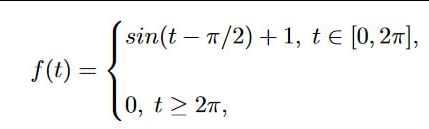
виконати ПЛ, а саме знайти коефiцiєнти f^N := (f0, f1, ..., fN)^⊤ при N = 20.

In [21]:
def function(t):
    if t >= 0 and t <= 2*np.pi:
        return np.sin(t-np.pi/2) + 1
    else:
        return 0

In [33]:
def tabulate_lagger_transform(function, n, epsilon=0.001, beta=2, sigma=4):
    transformed = lagger_transformation(function, n, epsilon, beta, sigma)
    cols = {"n": range(0, n+1), "transformed": transformed}
    print(pd.DataFrame(cols).round(4))

In [34]:
n_slider1 =  widgets.IntSlider(value=10, min=1, max=50, step=1, description='N=')
interactive_tabl = interactive(tabulate_lagger_transform, function=fixed(function), n=n_slider1, epsilon=fixed(0.001), beta=fixed(2), sigma=fixed(4))

display(interactive_tabl)


interactive(children=(IntSlider(value=10, description='N=', max=50, min=1), Output()), _dom_classes=('widget-i…

6. Побудувати функцiю, яка для заданої послiдовностi h^N = (h0, h1, ..., hk, ... hN , 0, 0, ...)⊤, N ∈ N, (яка має скiнчене число вiдмiнних вiд нуля елементiв) обчислює значення функцiї h~^N(t) у точцi t ∈ R+ за формулою (1.4).

In [14]:
def reverse_lagger_transformation(f, N, t, transformed, beta=2, sigma=4):
    sum = 0
    for k in range(N):
        sum += transformed[k] * lagger(t, k, beta, sigma)
    return sum

7. За даними завдання 2 побудувати графiки функцiй Лаґерра ln(t), t ∈ [0, T], n ∈ [0, N].

In [15]:
def draw_lagger(T, N, beta=2, sigma=4):
    x = np.arange(0, T + 1, 0.01)

    fig, ax = plt.subplots()
    ax.set_title('Laguerre polynomials $L_n$')

    for n in range(N + 1):
        ax.plot(x, lagger(x, n, beta, sigma), label=rf'$L_{n}$')

    plt.xlabel('t')
    plt.ylabel('L(t)')
    plt.title('Plot of Laguerre function')
    plt.legend()
    plt.grid(True)
    plt.show()

In [16]:
def plot_lagger_with_widgets(number_of_plots):
    draw_lagger(20, number_of_plots, 2, 4)

In [20]:
interact(plot_lagger_with_widgets, number_of_plots=widgets.IntSlider(min=1, max=20, step=1, value=5))

interactive(children=(IntSlider(value=5, description='number_of_plots', max=20, min=1), Output()), _dom_classe…

<function __main__.plot_lagger_with_widgets(number_of_plots)>

Завдання: виконати обернене перетворення Лаґерра для своєї фунції.
Функція: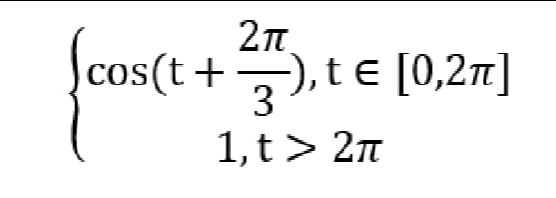

In [26]:
def fun(t):
       
    if 0 <= t <= 2 * np.pi:
        return np.cos(t + 2 * np.pi / 3)
    elif t > 2 * np.pi:
        return 1
    else:
        raise ValueError("Incorrect t")

8. Для функцiї з завдання 5 виконати пряме i обернене ПЛ при деяких значеннях N. Побудувати графiк функцiї f~N(t), t ∈ [0, 2π].

In [18]:
def draw_rlt(f, N, epsilon=0.001, beta=2, sigma=4):
    transformed_values = lagger_transformation(f, N, epsilon, beta, sigma)

    def fun(x):
        return reverse_lagger_transformation(f, N, x, transformed_values, beta, sigma)

    t_values = np.linspace(0, 2 * np.pi, 100)
    f_y_values = np.vectorize(f)(t_values)
    fun_y_values = np.vectorize(fun)(t_values)

    plt.plot(t_values, fun_y_values, label="Reverse Laguerre Transform")
    plt.plot(t_values, f_y_values, label="Original Function")
    plt.xlabel('t')
    plt.ylabel('Function Value')
    plt.title('Plot of Reverse Laguerre Transformed Function')
    plt.legend()
    plt.grid(True)
    plt.show()

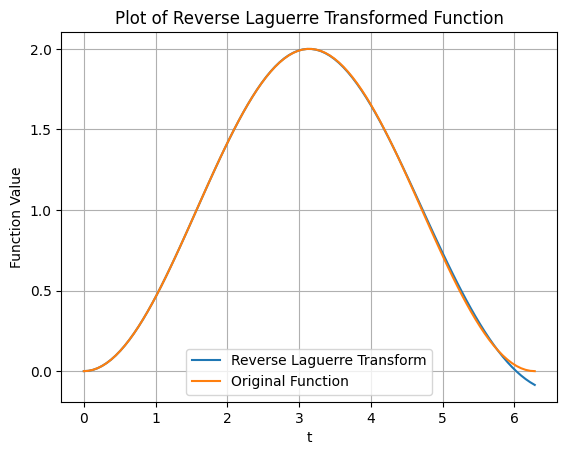

In [22]:
draw_rlt(function, 10, 0.001, 2, 4)

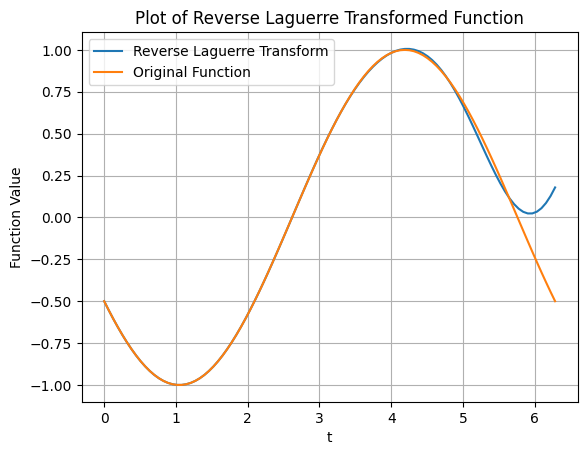

In [27]:
draw_rlt(fun, 21, 0.001, 2, 4)

Висновок: При виконанні цієї лабораторної роботи я наисав функції для табулювання та обчислення функцій Лагерра. Також обчислив значення інтегралів, виконав пряме та обернене ПЛ для заданої функції та побудував графіки для візуалізації результатів. Завдяки цьому проекту я не тільки поглибив своє розуміння функцій Лагерра, але й зміцнив свої навички програмування мовою Python, та навчився використовувати widgets які є дійсно корисними у візуалізації даних. 